# Import initial utilities


In [ ]:
from timeit import timeit
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import time
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import CategoricalNB

from timeit import timeit
import time

from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
%matplotlib inline

In [2]:
# workdirectory = '/home/jazhiel/ML_Notebooks/Cosmology_ML/'
workdirectory = ''

# Import GADGET DS


In [3]:
data_dict = np.load(workdirectory + 'OUTFILE1M.npz') 
test_flags  = data_dict['test_flags']
test_hosts  = data_dict['test_hosts']
test_mass   = data_dict['test_mass']
test_labels = data_dict['test_labels']
test_input  = data_dict['test_input']
#test_snid   = dict_data['test_snid']
#test_labels = dict_data['test_labels']
print(test_mass)
print(np.sum(test_labels))

[-1.00000000e+00  2.72242898e+13  1.13894322e+13 ... -1.00000000e+00
 -1.00000000e+00 -1.00000000e+00]
289964


# Data preprocessing

In [4]:
dr1 = pd.DataFrame(test_input[0], columns = ['dr1'])
dr2 = pd.DataFrame(test_input[1], columns = ['dr2'])
dr3 = pd.DataFrame(test_input[2], columns = ['dr3'])
dr4 = pd.DataFrame(test_input[3], columns = ['dr4'])
dr5 = pd.DataFrame(test_input[4], columns = ['dr5'])
dr6 = pd.DataFrame(test_input[5], columns = ['dr6'])
dr7 = pd.DataFrame(test_input[6], columns = ['dr7'])
dr8 = pd.DataFrame(test_input[7], columns = ['dr8'])
dr9 = pd.DataFrame(test_input[8], columns = ['dr9'])
dr10 = pd.DataFrame(test_input[9], columns = ['dr10'])
#mass = pd.DataFrame(test_mass, columns = ['Halo_Mass'])
lbl = pd.DataFrame(test_labels, columns =['labels'])


# Select all features and create dataframe

In [5]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
df = pd.concat([dr1, dr2, dr3, dr4, dr5, dr6, dr7, dr8, dr9, dr10, lbl], axis=1, ignore_index=False, sort=False)
df.describe()
#df_copy = pd.concat([dr1, dr2, dr3, dr4, dr5, dr6, dr7, dr8, dr9, dr10], axis = 1, ignore_index=False, sort=False)
#df_feat = pd.concat([dr1,lbl], axis = 1, ignore_index=False, sort=False)
#df_feat
#df_feat = pd.DataFrame(dr1)
#df_feat

,dr1,dr2,dr3,dr4,dr5,dr6,dr7,dr8,dr9,dr10,labels
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,0.040697,0.034862,0.031188,0.029510,0.023249,0.019781,0.015974,0.012721,0.009786,0.007440,0.289964
std,0.227756,0.189632,0.172109,0.165140,0.141545,0.128470,0.113819,0.100527,0.087283,0.074727,0.453746
min,-0.595585,-0.549892,-0.513209,-0.493975,-0.424237,-0.388504,-0.333991,-0.275244,-0.223792,-0.192789,0.000000
25%,-0.121499,-0.100307,-0.091526,-0.088415,-0.078871,-0.073475,-0.066620,-0.059508,-0.052420,-0.045206,0.000000
50%,0.013326,0.016408,0.016513,0.016246,0.014070,0.012956,0.010306,0.008146,0.006022,0.004334,0.000000
75%,0.172316,0.150792,0.138625,0.133218,0.114404,0.103466,0.091056,0.079689,0.068860,0.059217,1.000000
max,2.196388,1.440001,1.224202,1.120423,0.816344,0.678405,0.520247,0.408871,0.331112,0.266773,1.000000


# Concatenate and shuffle dataset, then select the training and testing set

In [6]:
# df_0 = df.sort_values('labels').head(35604).sample(14300)
# df_1 = df.sort_values('labels').tail(14396).sample(14300) 
# df_1.labels.sum()
# df_r = pd.concat([df_0, df_1])

df_r = df

randomize = np.random.permutation(len(df_r.values))
data = df_r.values[randomize]

In [7]:
# Define a size for your train set 
split = 0.8
ntrain = int(split * len(data))
indx = [ntrain]
train_set, test_set = np.split(data, indx)

split = 0.5
ntrain = int(split * len(test_set))
indx = [ntrain]
validation_set, test_test = np.split(test_set, indx)

In [8]:
X_train = train_set[:, :-1]
y_train = train_set[:, -1]

X_val = validation_set[:, :-1]
y_val = validation_set[:, -1]

X_test = test_set[:, :-1]
y_test = test_set[:, -1]

In [9]:
xscaler = StandardScaler()
# scalerz = MinMaxScaler(feature_range=(-1,1))
# fit scaler on data
xscaler.fit(X_train)
# apply transform
X_train = xscaler.transform(X_train)
X_val = xscaler.transform(X_val)
X_test = xscaler.transform(X_test)

In [10]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
    


np.set_printoptions(precision=2)

# Select data, X for attributes, y for labels

In [12]:
X_train.shape

(800000, 10)

Prediccion con Regression logistica


tiempo de ejecucción  6.683725230693817 s promedio para 100 repeticiones
Normalized confusion matrix
[[0.91 0.09]
 [0.48 0.52]]


<Figure size 432x288 with 0 Axes>

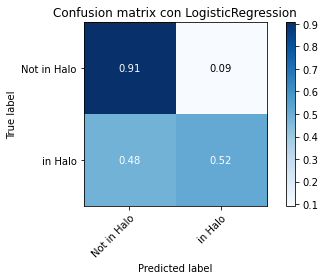

AttributeError: type object 'PrecisionRecallDisplay' has no attribute 'from_estimator'

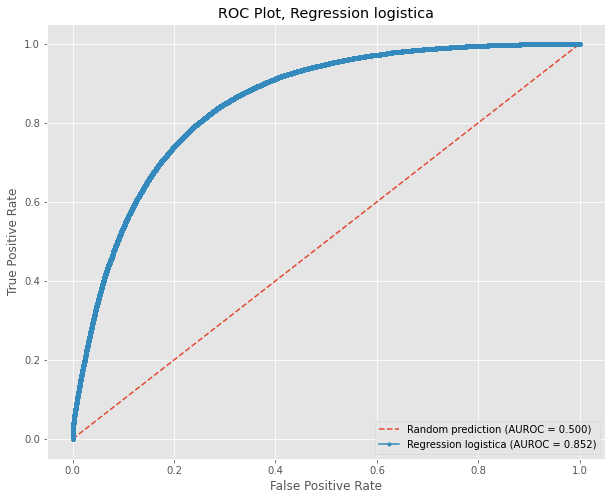

In [13]:
Lg = LogisticRegression(random_state=0)

inicio = time.time()

# Código a medir
for j in range(100):
    y_pred = Lg.fit(X_train, y_train).predict(X_test)
# -------------

fin = time.time()
print("tiempo de ejecucción ",(fin-inicio)/100, "s promedio para 100 repeticiones") # 1.5099220275878906


In [ ]:

# print(timeit('LogisticRegression(random_state=0).fit(X_train, y_trainl).predict(X_test)', number=500))

class_names=['Not in Halo','in Halo']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize = True,
                      title='Confusion matrix con LogisticRegression')
plt.grid(False)
plt.show()

y1=y_pred
y_pred=y1
r_probs = [0 for _ in range(len(y_test))]
rf_probs = Lg.predict_proba(X_test)
rf_probs = rf_probs[:, 1]

from sklearn.metrics import roc_auc_score, roc_curve, auc
plt.style.use('ggplot')
plt.figure(figsize=(10,8))

r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
# print('Random Forest: AUROC = %.3f' % (rf_auc))

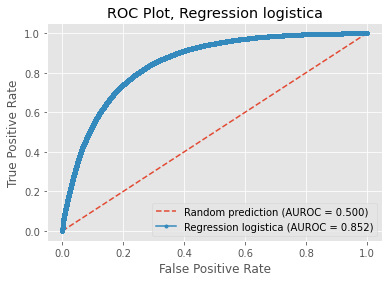

In [16]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Regression logistica (AUROC = %0.3f)' % rf_auc)
plt.title('ROC Plot, Regression logistica')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend(loc=4) # 
# Show plot
plt.grid(True)

In [18]:
# display = PrecisionRecallDisplay.from_estimator(
#     Lg, X_test, y_test, name="Regression logistica"
# )
# _ = display.ax_.set_title("Precision-Recall curve")


print("Precision: ",average_precision_score(y_test, y_pred),"\n")
print("recall: ",recall_score(y_test, y_pred, average='macro'),"\n")
print("f1_score: ",f1_score(y_test, y_pred, average='macro'),"\n")

Precision:  0.4986046521718245 

recall:  0.7117877253211299 

f1_score:  0.7269681249348848 



## support vector machine


In [ ]:
clf = svm.SVC(probability=True)



inicio = time.time()

# Código a medir
for j in range(1):
    y_pred = clf.fit(X_train, y_train).predict(X_test)
# -------------

fin = time.time()
print("tiempo de ejecucción ",(fin-inicio)/1, "s promedio para 1 repeticiones") # 1.5099220275878906



In [ ]:
class_names=['Not in Halo','in Halo']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize = True,
                      title='Confusion matrix con Suport vector machine')
plt.grid(False)
plt.show()


In [ ]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = clf.predict_proba(X_test)
rf_probs = rf_probs[:, 1]

plt.figure(figsize=(10,8))

r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
# print('Random Forest: AUROC = %.3f' % (rf_auc))

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Suport vector machine (AUROC = %0.3f)' % rf_auc)
plt.title('ROC Plot, Suport vector machine')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend(loc=4) # 
# Show plot
plt.grid(True)




# plot the precision-recall curves
# display = PrecisionRecallDisplay.from_estimator(
#     clf, X_test, y_test, name="support vector machine"
# )
# _ = display.ax_.set_title("Precision-Recall curve")

In [ ]:
print("Precision: ",average_precision_score(y_test, y_pred),"\n")
print("recall: ",recall_score(y_test, y_pred, average='macro'),"\n")
print("f1_score: ",f1_score(y_test, y_pred, average='macro'),"\n")

## Gaussian Naive bayes

In [ ]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)


inicio = time.time()

# Código a medir
for j in range(100):
    y_pred = gnb.fit(X_train, y_train).predict(X_test)
# -------------

fin = time.time()
print("tiempo de ejecucción ",(fin-inicio)/100, "s promedio para 100 repeticiones")

In [ ]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize = True,
                      title='Confusion matrix con Gaussian NB')
plt.grid(False)
plt.show()

In [ ]:

r_probs = [0 for _ in range(len(y_test))]
rf_probs = gnb.predict_proba(X_test)
rf_probs = rf_probs[:, 1]

plt.style.use('ggplot')
plt.figure(figsize=(10,8))

r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
# print('Random Forest: AUROC = %.3f' % (rf_auc))

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Naive Bayes gaussi (AUROC = %0.3f)' % rf_auc)
plt.title('ROC Plot, Naive Bayes gauss')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend(loc=4) # 
# Show plot
plt.grid(True)
# plt.savefig('/home/jazhiel/Escritorio/Maestria/Machine_Learning/IMG_Tesis/ROC_RF.png')
# plt.show()



# plot the precision-recall curves


# display = PrecisionRecallDisplay.from_estimator(
#     gnb, X_test, y_test, name="Naive bayes gaussiano"
# )
# _ = display.ax_.set_title("Precision-Recall curve")

In [ ]:

print("Precision: ",average_precision_score(y_test, y_pred),"\n")
print("recall: ",recall_score(y_test, y_pred, average='macro'),"\n")
print("f1_score: ",f1_score(y_test, y_pred, average='macro'),"\n")

## Naive bayes bernoulli

In [ ]:
ber = BernoulliNB()


inicio = time.time()

# Código a medir
for j in range(100):
    y_predber = ber.fit(X_train, y_trainl).predict(X_test)
# -------------

fin = time.time()
print("tiempo de ejecucción ",(fin-inicio)/100, "s promedio para 100 repeticiones")



y_pred = ber.fit(X_train, y_trainl).predict(X_test)
# clf.fit(X, Y)
# BernoulliNB()
# print(clf.predict(X[2:3])


# y_pred = com.fit(X_train, y_trainl).predict(X_test)



In [ ]:
plt.figure()
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize = True,
                      title='Confusion matrix con Bernoulli NB')
plt.grid(False)
# plt.show()

# plot the precision-recall curves
# display = PrecisionRecallDisplay.from_estimator(
#     ber, X_test, y_test, name="Naive bayes bernoulli"
# )
# _ = display.ax_.set_title("Precision-Recall curve")

In [ ]:
print("Precision: ",average_precision_score(y_test, y_pred),"\n")
print("recall: ",recall_score(y_test, y_pred, average='macro'),"\n")
print("f1_score: ",f1_score(y_test, y_pred, average='macro'),"\n")

## Multinomial Naive Bayes

In [ ]:
mult = MultinomialNB()

# print(X_train["dr1"][0])
h=0
g=0
# d=pd.DataFrame(np.arange(12).reshape([4,3]),index=["a","b","c","d"],columns=["A","B","C"])
# d.loc['a':"d",'A':'C']=1+d.loc['a':"d",'A':'C']
X_test2=X_test.copy(deep=True) 
X_train2=X_train.copy(deep=True) 

X_test2.loc[:,:]=1+X_test2.loc[:,:]
X_train2.loc[:,:]=1+X_train2.loc[:,:]
# print(X_test)

   
y_pred = mult.fit(X_train2, y_trainl).predict(X_test2)


inicio = time.time()

# Código a medir
for j in range(100):
    y_pred = mult.fit(X_train2, y_trainl).predict(X_test2)
# -------------

fin = time.time()
print("tiempo de ejecucción ",(fin-inicio)/100, "s promedio para 100 repeticiones")


In [ ]:
plt.figure()
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize = True,
                      title='Confusion matrix con naive bayes multinomial')
plt.grid(False)
plt.show()

In [ ]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = mult.predict_proba(X_test2)
rf_probs = rf_probs[:, 1]

plt.style.use('ggplot')
plt.figure(figsize=(10,8))

r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
# print('Random Forest: AUROC = %.3f' % (rf_auc))

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Naive Bayes Multoinomial (AUROC = %0.3f)' % rf_auc)
plt.title('ROC Plot, Naive Bayes Multinomial')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend(loc=4) # 
# Show plot
plt.grid(True)
# plt.savefig('/home/jazhiel/Escritorio/Maestria/Machine_Learning/IMG_Tesis/ROC_RF.png')
# plt.show()



# plot the precision-recall curves

# display = PrecisionRecallDisplay.from_estimator(
#     mult, X_test2, y_test, name="Naive bayes multinomial"
# )
# _ = display.ax_.set_title("Precision-Recall curve")


In [ ]:
print("Precision: ",average_precision_score(y_test, y_pred),"\n")
print("recall: ",recall_score(y_test, y_pred, average='macro'),"\n")
print("f1_score: ",f1_score(y_test, y_pred, average='macro'),"\n")

## Naive bayes complement

In [ ]:
com = ComplementNB()

inicio = time.time()

# Código a medir
for j in range(100):
    y_pred = com.fit(X_train2, y_trainl).predict(X_test2)
# -------------

fin = time.time()
print("tiempo de ejecucción ",(fin-inicio)/100, "s promedio para 100 repeticiones")


ComplementNB()
y_pred = com.fit(X_train2, y_trainl).predict(X_test2)


In [ ]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize = True,
                      title='Confusion matrix con Complement NB')
plt.grid(False)
# plt.show()


r_probs = [0 for _ in range(len(y_test))]
rf_probs = com.predict_proba(X_test2)
rf_probs = rf_probs[:, 1]

plt.style.use('ggplot')
plt.figure(figsize=(10,8))

r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
# print('Random Forest: AUROC = %.3f' % (rf_auc))

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Naive Bayes Complement (AUROC = %0.3f)' % rf_auc)
plt.title('ROC Plot, Naive Bayes Complement')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend(loc=4) # 
# Show plot
plt.grid(True)
# plot the precision-recall curves


In [ ]:
# display = PrecisionRecallDisplay.from_estimator(
#     com, X_test2, y_test, name="Naive bayes complement"
# )
# _ = display.ax_.set_title("Precision-Recall curve")


print("Precision: ",average_precision_score(y_test, y_pred),"\n")
print("recall: ",recall_score(y_test, y_pred, average='macro'),"\n")
print("f1_score: ",f1_score(y_test, y_pred, average='macro'),"\n")

## Categorical Naive Bayes

In [ ]:
cat = CategoricalNB()
inicio = time.time()

# Código a medir
for j in range(100):
    y_pred = cat.fit(X_train2, y_trainl).predict(X_test2)
# -------------

fin = time.time()
print("tiempo de ejecucción ",(fin-inicio)/100, "s promedio para 100 repeticiones")




y_pred = cat.fit(X_train2, y_trainl).predict(X_test2)


In [ ]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize = True,
                      title='Confusion matrix con Categorical NB')
plt.grid(False)
plt.show()



r_probs = [0 for _ in range(len(y_test))]
rf_probs = cat.predict_proba(X_test2)
rf_probs = rf_probs[:, 1]

In [ ]:
# display = PrecisionRecallDisplay.from_estimator(
#     cat, X_test2, y_test, name="Naive bayes categorical"
# )
# _ = display.ax_.set_title("Precision-Recall curve")

print("Precision: ",average_precision_score(y_test, y_pred),"\n")
print("recall: ",recall_score(y_test, y_pred, average='macro'),"\n")
print("f1_score: ",f1_score(y_test, y_pred, average='macro'),"\n")

## Codigo curvas roc

In [ ]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = ber.predict_proba(X_test)
rf_probs = rf_probs[:, 1]

from sklearn.metrics import roc_auc_score, roc_curve, auc
plt.style.use('ggplot')
plt.figure(figsize=(10,8))

rf_probs = rf.predict_proba(X_test)
rf_probs = rf_probs[:, 1]
plt.style.use('ggplot')
# plt.figure(figsize=(10,8))

r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)

plt.legend(loc=4) # 
# -------------------------------------------------

r_probs = [0 for _ in range(len(y_test))]
rf_probs = Lg.predict_proba(X_test)
rf_probs = rf_probs[:, 1]


r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Regression logistica (AUROC = %0.3f)' % rf_auc)


plt.legend(loc=4) # 

# ----------------------------------------------


rf_probs = gnb.predict_proba(X_test)
rf_probs = rf_probs[:, 1]

r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)


r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

plt.plot(rf_fpr, rf_tpr, marker='.', label='Naive Bayes gaussi (AUROC = %0.3f)' % rf_auc)

# Show legend
plt.legend(loc=4) # 

# --------------------------------------------------------



rf_probs = clf.predict_proba(X_test)
rf_probs = rf_probs[:, 1]


r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)


r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

plt.plot(rf_fpr, rf_tpr, marker='.', label='Suport vector machine (AUROC = %0.3f)' % rf_auc)


plt.legend(loc=4) # 

# ---------------------------------------------------



r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

plt.plot(rf_fpr, rf_tpr, marker='.', label='Naive Bayes Bernoulli (AUROC = %0.3f)' % rf_auc)
plt.title('ROC Plot, Naive Bayes Bernoulli')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend(loc=4) # 

plt.grid(True)

# ------------------------------




y_pred = mult.fit(X_train2, y_trainl).predict(X_test2)


r_probs = [0 for _ in range(len(y_test))]
rf_probs = mult.predict_proba(X_test2)
rf_probs = rf_probs[:, 1]


r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)


r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Naive Bayes Multoinomial (AUROC = %0.3f)' % rf_auc)


plt.legend(loc=4) # 

# --------------------------------------

y_pred = com.fit(X_train2, y_trainl).predict(X_test2)
rf_probs = com.predict_proba(X_test2)
rf_probs = rf_probs[:, 1]


r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Naive Bayes Complement (AUROC = %0.3f)' % rf_auc)

# Show legend
plt.legend(loc=4) # 


# --------------------------------



r_probs = [0 for _ in range(len(y_test))]
rf_probs = cat.predict_proba(X_test)
rf_probs = rf_probs[:, 1]

r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Naive Bayes Categorical (AUROC = %0.3f)' % rf_auc)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)


# Show legend
plt.legend(loc=4) # 

# ------------------------------------------


# ROC curve

In [ ]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = rf.predict_proba(X_test)
rf_probs = rf_probs[:, 1]

from sklearn.metrics import roc_auc_score, roc_curve, auc
plt.style.use('ggplot')
# plt.figure(figsize=(10,8))

r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.title('ROC Plot, Random Forest')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend(loc=4) # 
# Show plot
plt.grid(True)
# plt.savefig('/home/jazhiel/Escritorio/Maestria/Machine_Learning/IMG_Tesis/ROC_RF.png')
plt.show()

In [ ]:
features = ['$\delta_{r1}$', '$\delta_{r2}$', '$\delta_{r3}$', '$\delta_{r4}$', '$\delta_{r5}$', '$\delta_{r6}$', '$\delta_{r7}$', '$\delta_{r8}$', '$\delta_{r9}$', '$\delta_{r10}$']
feature_imp = pd.Series(rf.feature_importances_,index=features)
print(feature_imp)
plt.figure(figsize=(8,6))
plt.style.use('ggplot')
# Creating a bar plot
sns.barplot(x=feature_imp.index, y=feature_imp)
# Add labels to your graph
plt.xlabel('Features')
plt.ylabel('Features Importance Score')
plt.title("Relative feature importances, Random Forest")
plt.legend()
plt.savefig('/home/jazhiel/Escritorio/Maestria/Machine_Learning/IMG_Tesis/features_RF.png')
plt.show()

# Learning curve

In [ ]:
start_time = time.time()
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(rf, 
                                                        X, 
                                                        ylabels,
                                                        # Number of folds in cross-validation
                                                        cv=3,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))
print('---elapsed time = %s seconds ---' % (time.time()- start_time))

In [ ]:
X.shape

In [ ]:
#Create means and standard deviations for train set scores
plt.style.use('ggplot')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color='r',  label="Training score")
plt.plot(train_sizes, test_mean, color='b', label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes,
                 train_mean - train_std,
                 train_mean + train_std,
                 color="r", alpha =0.15)

plt.fill_between(train_sizes,
                 test_mean - test_std,
                 test_mean + test_std,
                 color="b", alpha = 0.15)

# Create plot

#plt.tight_layout()
plt.title("Learning Curve, Random Forest Classifier") # All Features, ENZO dataset")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.grid(True)
plt.savefig('/home/jazhiel/Escritorio/Maestria/Machine_Learning/IMG_Tesis/Learning_RF.png')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', max_depth=8, class_weight='balanced')
dt = dt.fit(X_train, y_trainl)
#Predict the response for test dataset
ypredl = dt.predict(X_test)
#Model accuracy, how often is the classifier correct
#print(cross_val_score(dt1, X1.reshape(-1,1), y, cv=6))
print('Training and testing, raw data, all features \n')
print("Accuracy:", metrics.accuracy_score(y_test, ypredl))
for i, score_tree in enumerate(cross_val_score(dt, X, ylabels, cv = 10)):
    print('Decision tree accuracy for the %d score: %0.2f' % (i, score_tree))
score_tree=cross_val_score(dt, X ,ylabels, cv=10)
#score_tree
cv_scores = []
print("Decision Tree Accuracy: %0.2f (+/- %0.2f)" % (score_tree.mean(), score_tree.std() * 2 ))
cv_score = score_tree.mean()
cv_scores.append(cv_score)

In [ ]:
plt.style.use('seaborn')


r_probs = [0 for _ in range(len(y_test))]
dt_probs = dt.predict_proba(X_test)
dt_probs = dt_probs[:, 1]

r_auc = roc_auc_score(y_test, r_probs)
dt_auc = roc_auc_score(y_test, dt_probs)

print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Decision Tree: AUROC = %.3f' % (dt_auc))

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dt_auc)
plt.title('ROC Plot: Classification Algorithms')

#r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
#rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
#plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
#plt.title('ROC Plot, $\delta r$')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend(loc=4) # 
# Show plot
#plt.savefig('/home/jazhiel/Escritorio/Maestria/Machine_Learning/IMG_Tesis/ROC_DT.jpg')
plt.show()
